## Exploratory Data Analysis

#### By: Anchal Garg (D20003)
####        Nipun Mohindra (D20019)
####        Tanya Mangath (D20036)

####  Ques: The attached data is relates to an attrition problem of a company. Study the data very carefully. The variables are self-explanatory. Start by identiyfing the variable types of the variables. This will help you to understand the kind of data exploration techniques you must use.

#### Each row in the dataset represent an employee. Every employee corresponds to a value of the variable "Attrition". A value of attrition = 1 indicate that the employee has left the company. In the same way, attirion = 0 would indicate that the employee is still working in the company. 

#### Your task will be to find 5 most important factors which you feel affects attrition.

Note : For better understanding of the data, we have also answered some of the questions that came to our mind while analysing the data. 

### _Part 1 : Calling the data and its description_###

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #This overrides the default style of matplot into seaborns beautiful graphs

In [2]:
#Calling the data
data= pd.read_csv(r"C:\Users\Tanya\Desktop\Files\attrition.csv")
data 

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [3]:
data.describe() #Checking the statistics of the data

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [4]:
data.head() #Top 5 rows of the data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [5]:
data.describe(include='all') #Description of all the variables in the data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,3,6,NaN,2,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,Life Sciences,NaN,Male,NaN,NaN,NaN,Married,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,961,606,NaN,882,NaN,NaN,NaN,673,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,NaN,NaN,2.721769,NaN,2.729932,2.063946,2.728571,NaN,6502.931293,NaN,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,NaN,NaN,NaN,1.093082,NaN,0.711561,1.106940,1.102846,NaN,4707.956783,NaN,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1009.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,2.000000,1.000000,2.000000,NaN,2911.000000,NaN,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,3.000000,2.000000,3.000000,NaN,4919.000000,NaN,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,3.000000,3.000000,4.000000,NaN,8379.000000,NaN,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000


In [6]:
new_data = data.copy()
new_data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})
new_data['Department'] = data['Department'].map({'Human Resources': 0, 'Research & Development': 1, 'Sales':2})
new_data['EducationField'] = data['EducationField'].map({'Human Resources': 0, 'Life Sciences': 1, 'Marketing':2, 'Medical':3, 'Other':4, 'Technical Degree':5})
new_data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
new_data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced': 0, 'Married': 1, 'Single':2})
new_data['OverTime'] = data['OverTime'].map({'Yes': 0, 'No': 1})

#Basically created dummy variables, so that we can study the categorical variables as the numerical ones


In [7]:
new_data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,1,2,1,2,0,3,2,4,2,5993,0,8,1,6,4,0,5,1
1,49,0,2,1,1,3,1,2,2,2,1,5130,1,10,3,10,7,1,7,8
2,37,1,1,1,4,4,1,2,1,3,2,2090,0,7,3,0,0,0,0,2
3,33,0,2,1,1,4,0,3,1,3,1,2909,0,8,3,8,7,3,0,3
4,27,0,1,1,3,1,1,3,1,2,1,3468,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,1,3,3,1,4,2,4,1,2571,1,17,3,5,2,0,3,23
1466,39,0,1,1,3,4,1,2,3,1,1,9991,1,9,3,7,7,1,7,6
1467,27,0,1,1,1,2,1,4,2,2,1,6142,0,6,3,6,2,0,3,4
1468,49,0,2,2,3,4,1,2,2,2,1,5390,1,17,2,9,6,0,8,2


In [8]:
new_data.describe()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,1.260544,2.247619,2.721769,0.600000,2.729932,2.063946,2.728571,1.097279,6502.931293,0.717007,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,0.532170,0.527792,1.331369,1.093082,0.490065,0.711561,1.106940,1.102846,0.730121,4707.956783,0.450606,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2911.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,4919.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000,3.000000,4.000000,2.000000,8379.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,2.000000,2.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,2.000000,19999.000000,1.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [9]:
#Grouping by selective variables
new_data[['MonthlyIncome','JobLevel','OverTime','Department']].groupby(['Department']).mean()

,MonthlyIncome,JobLevel,OverTime
Department,,,
0,6654.507937,2.031746,0.730159
1,6281.252862,1.977107,0.718002
2,6959.172646,2.255605,0.713004


In [10]:
new_data[['YearsSinceLastPromotion','JobInvolvement','TotalWorkingYears','Department']].groupby(['Department']).mean()

,YearsSinceLastPromotion,JobInvolvement,TotalWorkingYears
Department,,,
0,1.777778,2.746032,11.555556
1,2.137357,2.741935,11.342352
2,2.354260,2.701794,11.105381


### _Part 2 : Analysis_###


## Attrition

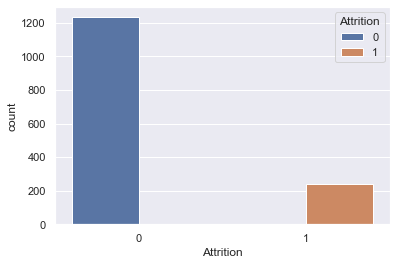

In [12]:
#To see how many employees left the organisation

sns.countplot(x = data['Attrition'],hue=data['Attrition'] , data = data)

## Age


In [13]:
new_data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

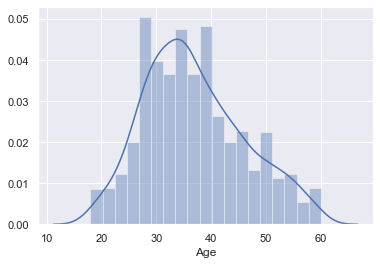

In [14]:
sns.distplot(new_data['Age'])

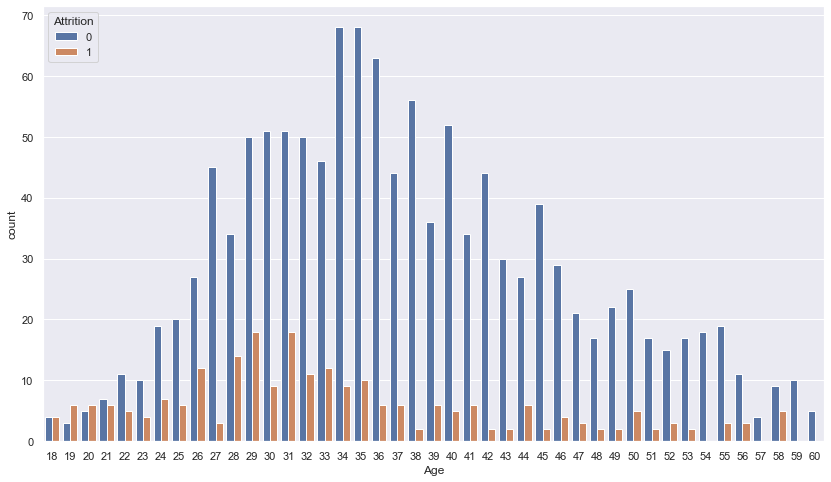

In [15]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['Age'],hue=new_data['Attrition'] , data = new_data)

According to the graph, age of most of the employees who left the organisation was between 26-35 years.

## Business Travel

In [16]:
new_data['BusinessTravel'].describe()

count    1470.000000
mean        1.086395
std         0.532170
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: BusinessTravel, dtype: float64

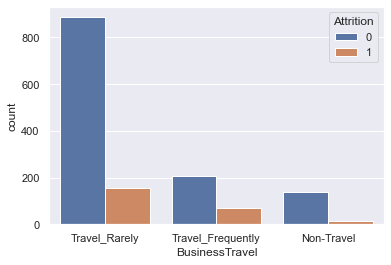

In [18]:
sns.countplot(x = data['BusinessTravel'],hue=data['Attrition'] , data = data)

Here, we can see that Travelling Rarely was a reason that lead to attrition since majority of the employees who left travelled rarely. 

Q. How does Marital Status affect travel of employees?

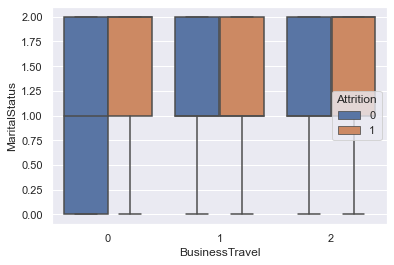

In [19]:
# 0 = Non Travel
# 1 = Rare Travel
# 2 = Frequent Travel


sns.boxplot(data=new_data, x='BusinessTravel', y='MaritalStatus', hue='Attrition')

Marital Status does not affect Business travel.

## Department

In [20]:
new_data['Department'].describe()

count    1470.000000
mean        1.260544
std         0.527792
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Department, dtype: float64

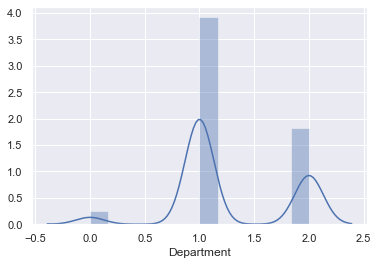

In [21]:
sns.distplot(new_data['Department'])

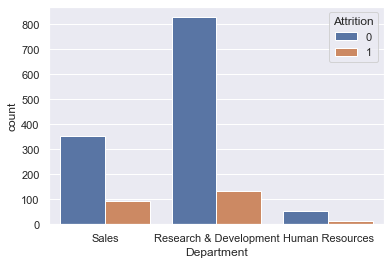

In [23]:
sns.countplot(x = data['Department'],hue=data['Attrition'] , data = data)

Most of the attrition was from the Research and Development department.

Q1. How is Job Satisfaction among all the departments?

Q2. Which department offers the lowest salaries?



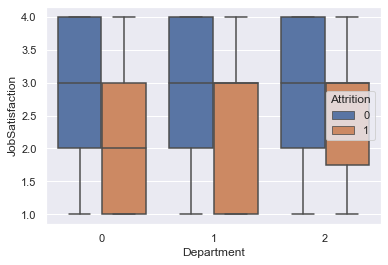

In [24]:
# 0 = HR Department
# 1 = R&D Department
# 2 = Sales Department


sns.boxplot(data=new_data, x='Department', y='JobSatisfaction', hue='Attrition')

HR and the R&D Department had the same level of Job satisfaction whereas Sales Department has a higher level of job satisafaction as compared to the other two. 

Despite having the same satisfaction, R&D Department has a way higher attrition as compared to the HR Department.

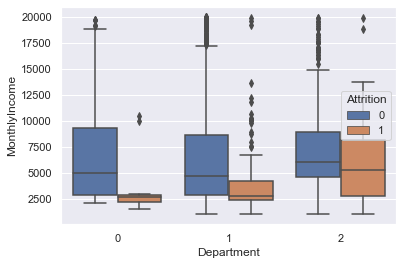

In [25]:
sns.boxplot(data=new_data, x='Department', y='MonthlyIncome', hue='Attrition')

R&D Department offers the lowest salaries and on the other hand Sales Department offers the highest salaries. This relates to the point that why employees of the R&D Deparment had more attriton.

Also, despite having lowest salaries, attrition in employees of the HR Department was the lowest. This maybe due to the fact that there are a few employees in the HR Department.

## Education Field

In [27]:
new_data['EducationField'].describe()

count    1470.000000
mean        2.247619
std         1.331369
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: EducationField, dtype: float64

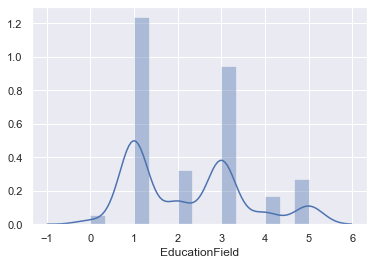

In [28]:
sns.distplot(new_data['EducationField'])

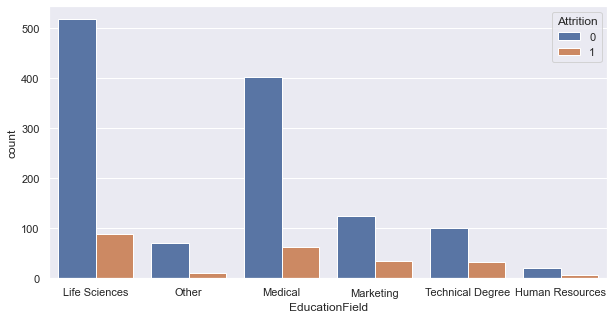

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x = data['EducationField'],hue=data['Attrition'] , data = data)

Employees having their educational background as Life Sciences or Medical observed the highest attrition. 

## Environment Satisfaction

In [30]:
new_data['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

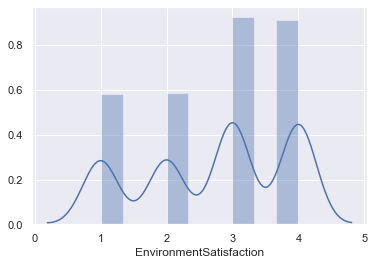

In [31]:
sns.distplot(new_data['EnvironmentSatisfaction'])

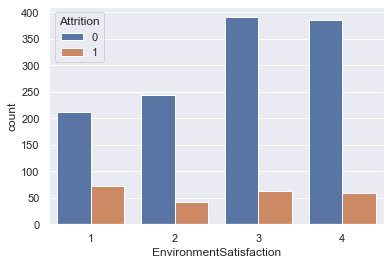

In [32]:
sns.countplot(x = new_data['EnvironmentSatisfaction'],hue=new_data['Attrition'] , data = new_data)

From here we can see that mostly employees with 1 satisfaction have attrition followed by 3, 4 and 2. We can conclude that environment satisfaction isn't a major reason for attrition as more or less environment satisfaction is the same among the employees who have left. 

## Gender

In [33]:
new_data['Gender'].describe()

count    1470.000000
mean        0.600000
std         0.490065
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

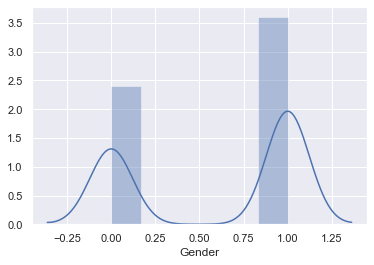

In [34]:
sns.distplot(new_data['Gender'])

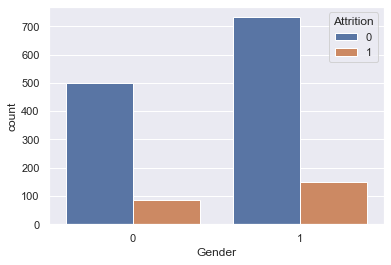

In [35]:
# 0 = female
# 1 = male

sns.countplot(x = new_data['Gender'],hue=new_data['Attrition'] , data = new_data)

Since most of the employees are males, attrition among males is more. 

Q1. Is gender inequality a reason for lower salaries and ultimately attrition? 

Q2. Are the female employees satisfied with the job environment?

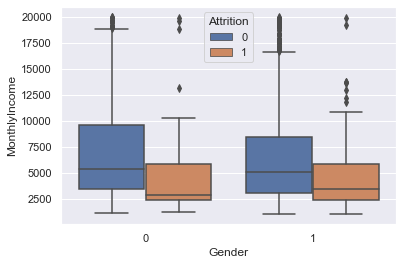

In [36]:
sns.boxplot(data=new_data, x='Gender', y='MonthlyIncome', hue='Attrition')

Females who left did have a lower salary as compared to the males who left. So, lower salary can be a reason for females who left the organisation. 

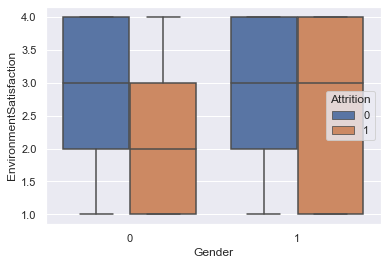

In [37]:
sns.boxplot(data=new_data, x='Gender', y='EnvironmentSatisfaction', hue='Attrition')

We can say that environment satisfaction was low among the female employees who left. 

## Job Involvement

In [38]:
new_data['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

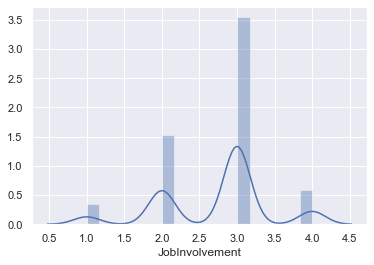

In [39]:
sns.distplot(new_data['JobInvolvement'])

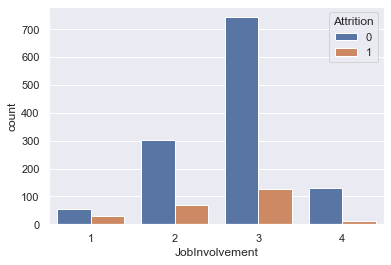

In [40]:
sns.countplot(x = new_data['JobInvolvement'],hue=new_data['Attrition'] , data = new_data)

Here, we observe highest attriotion among employees of job involvement 3 and then followed by 2. This implies that since most of the employees are involved at a level of 2 and 3, attrition is highest among them. 

## Job Level

In [41]:
new_data['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

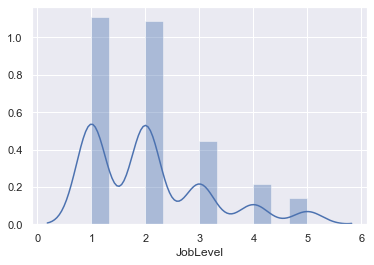

In [42]:
sns.distplot(new_data['JobLevel'])

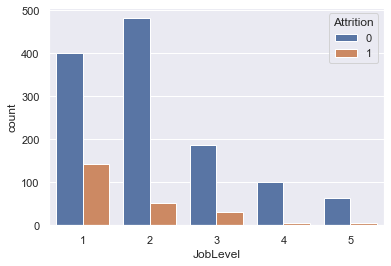

In [43]:
sns.countplot(x = new_data['JobLevel'],hue=new_data['Attrition'] , data = new_data)

Here, attrition was observed in employees at a lower job level.

## Job Satisfaction

In [44]:
new_data['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

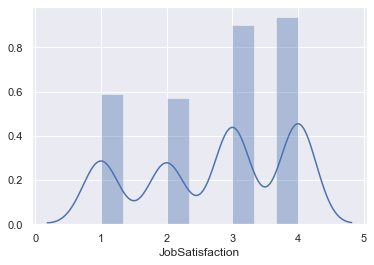

In [45]:
sns.distplot(new_data['JobSatisfaction'])

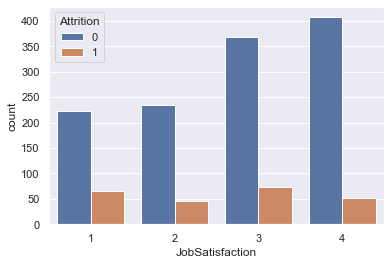

In [46]:
sns.countplot(x = new_data['JobSatisfaction'],hue=new_data['Attrition'] , data = new_data)

Job satisfaction doesn't look like a major reason for attrition since almost all the employees who left, more or less had the same satisfaction.

Q. How much is work life balance, over time, business travel and monthly income affecting job satisfaction?


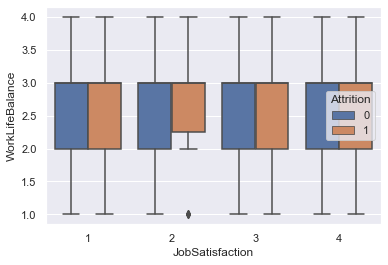

In [47]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='WorkLifeBalance', hue='Attrition')

Work life balance didn't affect the job satisfaction. 

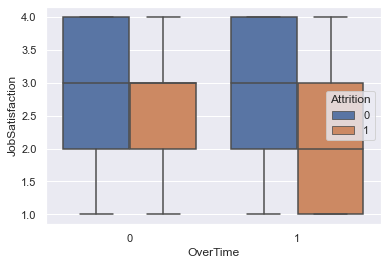

In [49]:
sns.boxplot(data=new_data, x='OverTime', y='JobSatisfaction', hue='Attrition')

Job satisfaction was lower among employees who did not work overtime. 

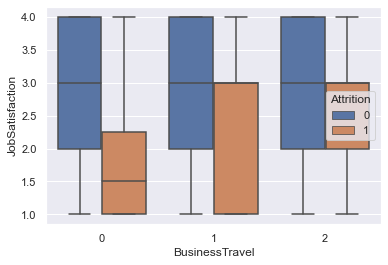

In [51]:
sns.boxplot(data=new_data, x='BusinessTravel', y='JobSatisfaction', hue='Attrition')

Here, employees who frequently travel have a higher job satisfaction. Whereas, employees who don't or rarely travel have lower job satisfaction.

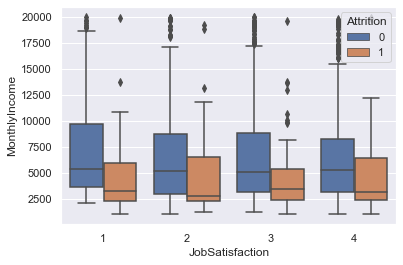

In [52]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='MonthlyIncome', hue='Attrition')

Income does affect job satisfaction as lower salary has resulted in lower job satisfaction. 

## Marital Status

In [53]:
new_data['MaritalStatus'].describe()

count    1470.000000
mean        1.097279
std         0.730121
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: MaritalStatus, dtype: float64

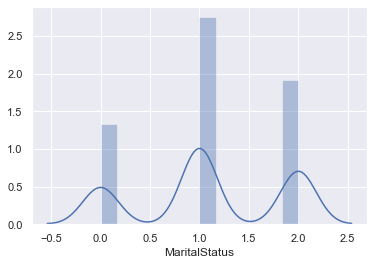

In [54]:
sns.distplot(new_data['MaritalStatus'])

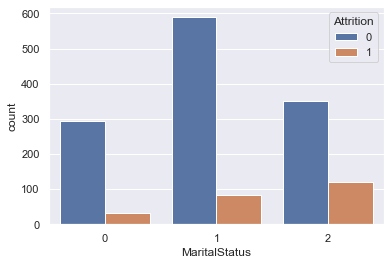

In [55]:
# 0 = Divorced
# 1 = Married
# 2 = Single

sns.countplot(x = new_data['MaritalStatus'],hue=new_data['Attrition'] , data = new_data)

Single employees were the ones who have had more attrition.

## Monthly Income

In [57]:
new_data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

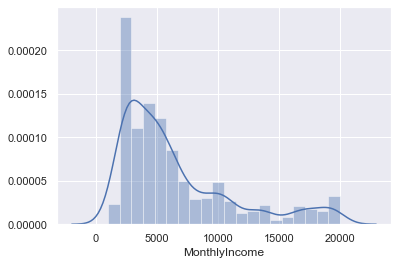

In [58]:
sns.distplot(new_data['MonthlyIncome'])

Q1. Is lower income contributing to attrition ?

Q2. Does marital status affect income ?

Q3. Is more job involvement and less income a factor for attrition ?

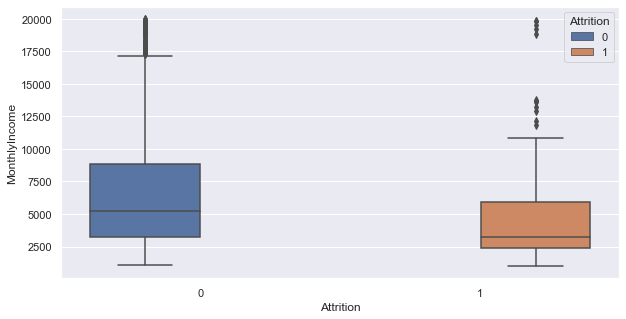

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(data=new_data, x='Attrition', y='MonthlyIncome', hue='Attrition')

Monthly income definitly contributes to attrition since employees who left were given lower salaries as compared to employees who didn't. 

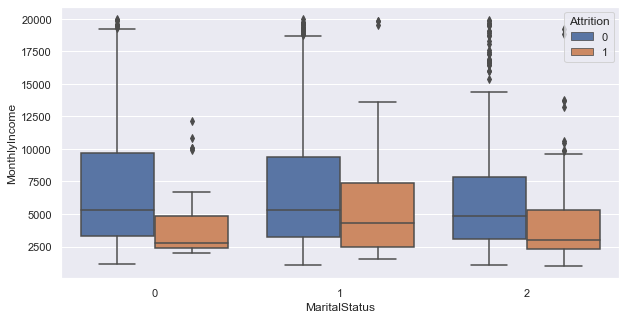

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=new_data, x='MaritalStatus', y='MonthlyIncome', hue='Attrition')

Here, Divorced and single employees who left had lower salaries. 

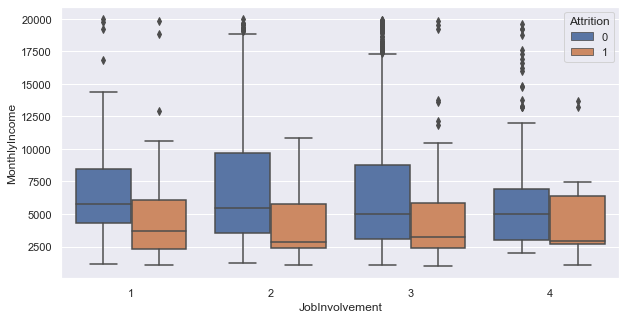

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(data=new_data, x='JobInvolvement', y='MonthlyIncome', hue='Attrition')

Among the employees who left, employees having job involvement of 4 had the lowest salaries followed by job involvement of 2. 

## Over Time

In [62]:
new_data['OverTime'].describe()

count    1470.000000
mean        0.717007
std         0.450606
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

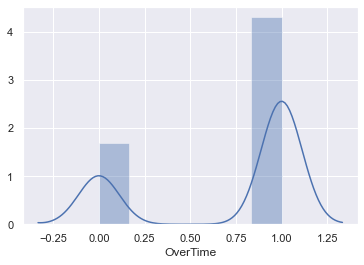

In [63]:


sns.distplot(new_data['OverTime'])

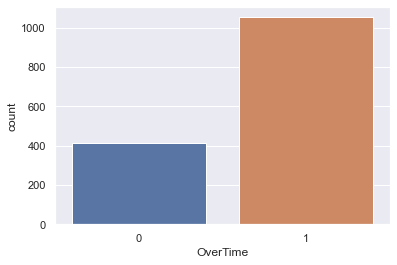

In [64]:
# yes = 0
# no = 1

sns.countplot(new_data['OverTime'])

A little over 400 employees worked overtime. 

Q. Are less experienced and lower income people doing more overtime?

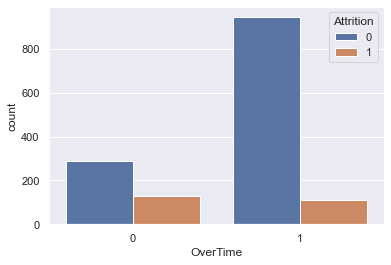

In [65]:
sns.countplot(x = new_data['OverTime'],hue=new_data['Attrition'] , data = new_data)

This tells us that overtime does contribute to attrition since half of the employees who  worked over time left. 

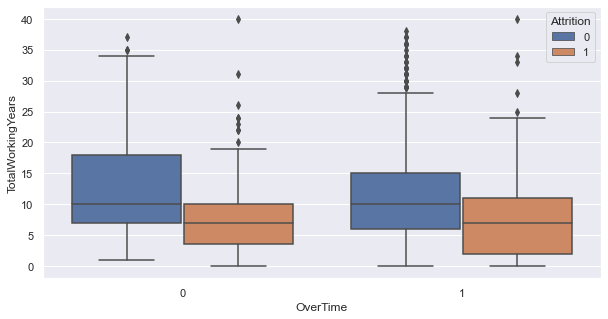

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(data=new_data, x='OverTime', y='TotalWorkingYears', hue='Attrition')

Here, more experienced employees worked over time as compared to less experienced employees. Also, employees who left and worked over time had less work experience as compared to those who did not work overtime and left.

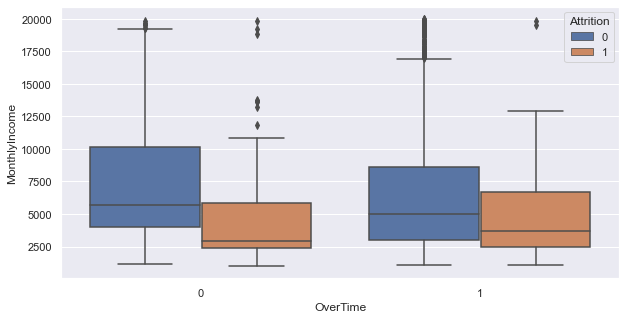

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(data=new_data, x='OverTime', y='MonthlyIncome', hue='Attrition')

From the box plot it is evident that lower salaries among employees who worked over time was a reason for attrition.

## Total Working Years

In [68]:
new_data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

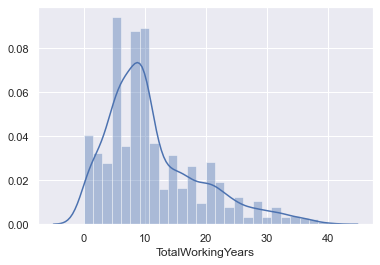

In [69]:
sns.distplot(new_data['TotalWorkingYears'])

Q1. Does less working years affect attrition ?


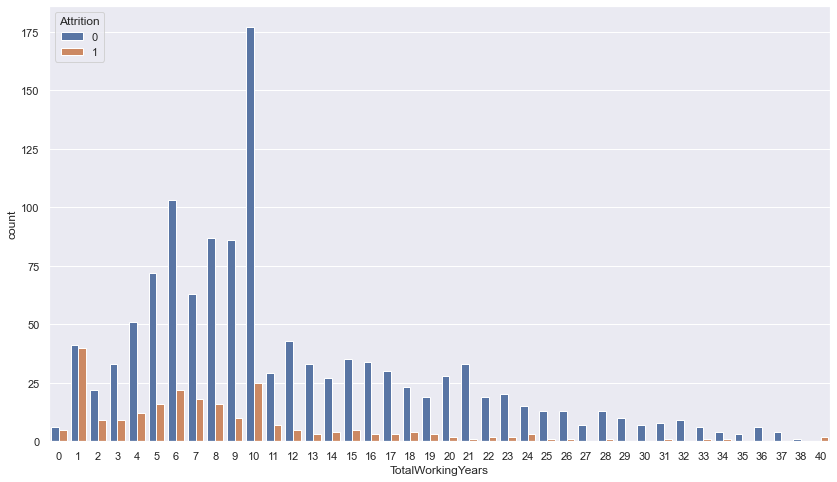

In [70]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['TotalWorkingYears'],hue=new_data['Attrition'] , data = new_data)

Here, most of the employees who left had either 0-1 years of work experience or 6-10 years. Basically, attrition was observed among those who were either freshers or experienced with 6-10 years. 


Q2. Does years since promotion and low income affects attrition ?

Q3. Does less experienced employees have lower income?



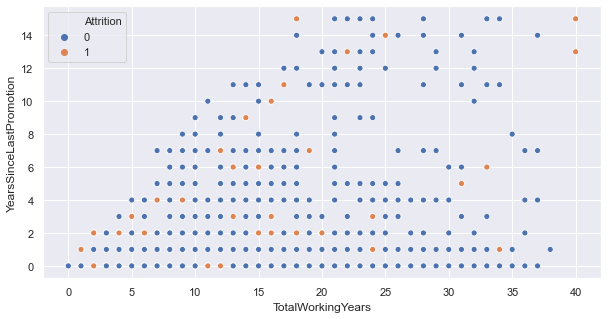

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= new_data['TotalWorkingYears'], y = new_data['YearsSinceLastPromotion'], hue = new_data['Attrition'])

Years since promotion is not a major reason for low income.

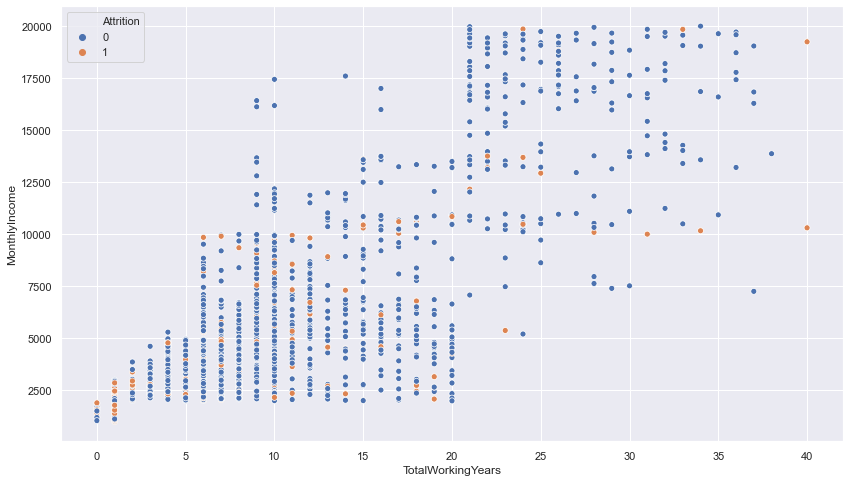

In [72]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= new_data['TotalWorkingYears'], y = new_data['MonthlyIncome'], hue = new_data['Attrition'])

Employees with less salary and less experience tend to leave.

## Work Life Balance

In [74]:
new_data['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

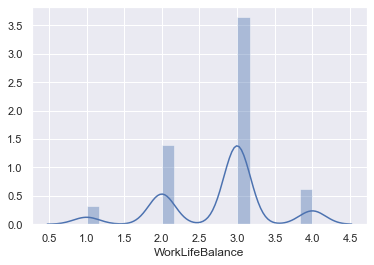

In [75]:
sns.distplot(new_data['WorkLifeBalance'])

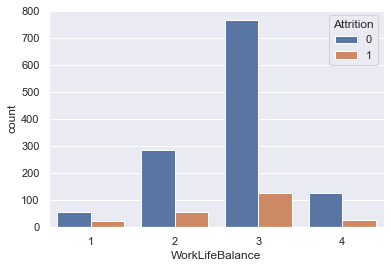

In [77]:
sns.countplot(x = new_data['WorkLifeBalance'],hue=new_data['Attrition'] , data = new_data)

Most of the employees had a work life balance of 3 followed by 2. Hence, work life balance isn't a reason for attrition.

## Years at Company


In [78]:
new_data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

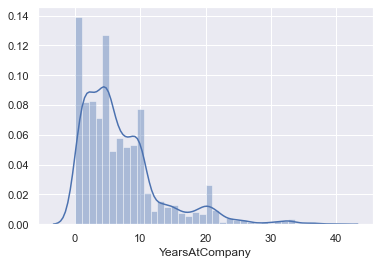

In [79]:
sns.distplot(new_data['YearsAtCompany'])

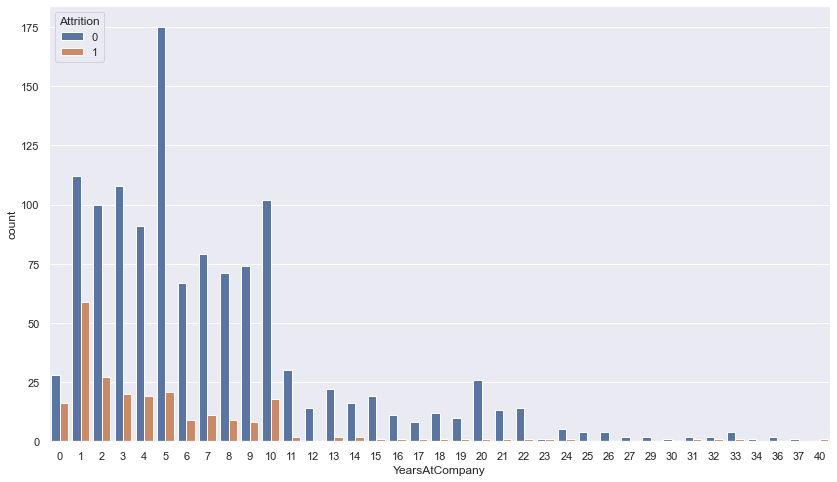

In [81]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsAtCompany'],hue=new_data['Attrition'] , data = new_data)

Here, most of the employees who left worked for 0-5 years at the company. 

## Years in Current Role

In [82]:
new_data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

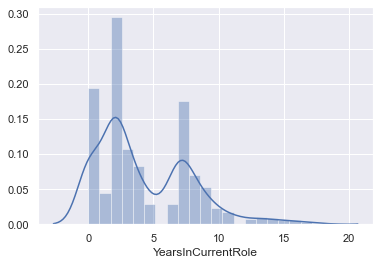

In [83]:
sns.distplot(new_data['YearsInCurrentRole'])

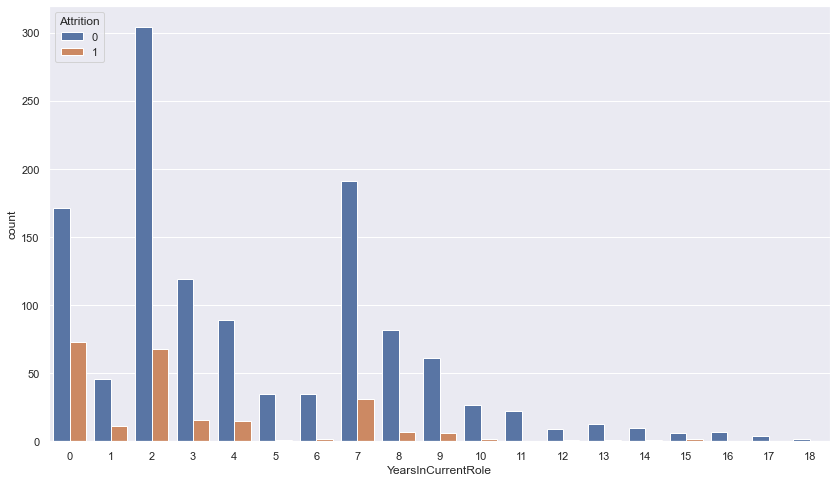

In [85]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsInCurrentRole'],hue=new_data['Attrition'] , data = new_data)

Most of the employees who left served 0-2 years the their current role. 

## Years Since Last Promotion

In [86]:
new_data['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

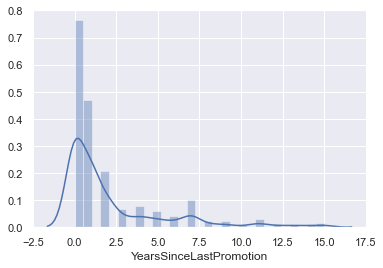

In [87]:
sns.distplot(new_data['YearsSinceLastPromotion'])

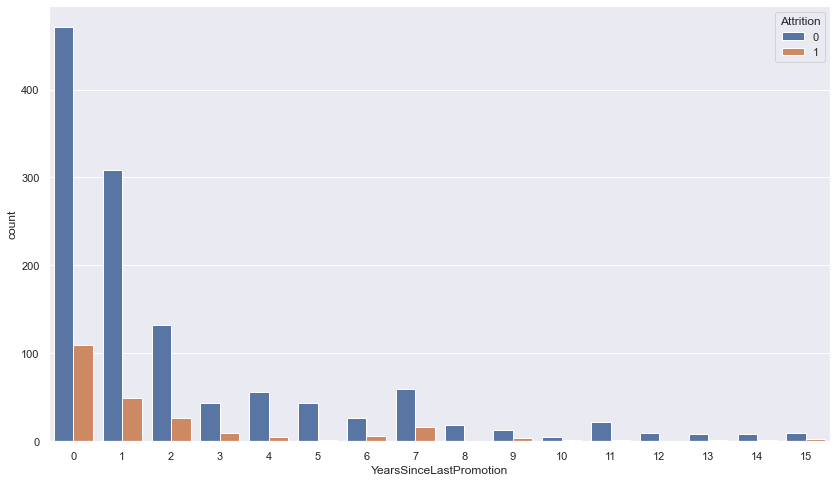

In [88]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsSinceLastPromotion'],hue=new_data['Attrition'] , data = new_data)

Most of the employees who left weren't promoted since the past 0-2 years. 

## YearsWithCurrManager

In [89]:
new_data['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

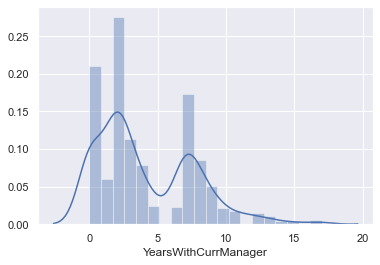

In [90]:
sns.distplot(new_data['YearsWithCurrManager'])

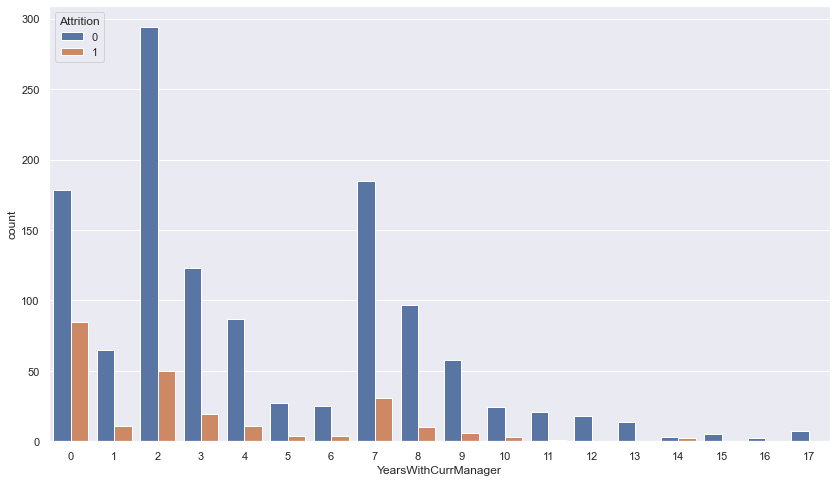

In [91]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsWithCurrManager'],hue=new_data['Attrition'] , data = new_data)

Most of the employees who left worked 0-2 years with their current manager.

## DistanceFromHome

In [92]:
new_data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

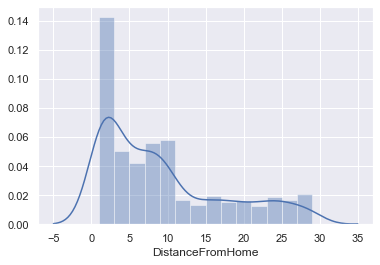

In [93]:
sns.distplot(new_data['DistanceFromHome'])

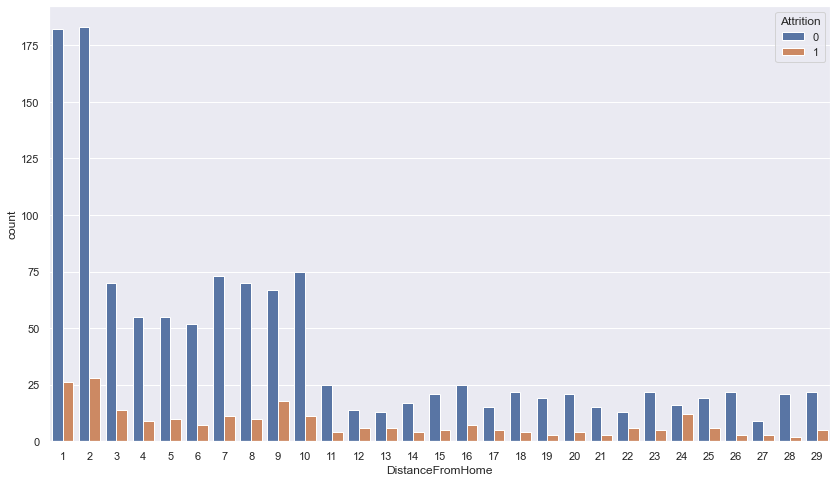

In [94]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['DistanceFromHome'],hue=new_data['Attrition'] , data = new_data)

Most of the employees who left lived <9 kms (assuming that the distance was in kilometers) away. Hence, we can say that distance from home isn't a major contributer to attrition. 

### _Part 3 : Conclusion_###


By the means of exploratory data analysis, the 5 most important factors that contributed to attrition are :

#### Monthly Income  
Emplyees who left had lower salaries when compared to emplyees who didn't leave. Also, even employees who had job involvement of 4 left the organisation maybe because of loads of work and low salary.

#### Over Time 
Over time contributed to attrition as half of the employees who were working overtime left. Also, employees working overtime received lower salaries as well. 

#### Business Travel
An interesting factor for attrition was Business Travel. We observed that majority of the employees who left travelled rarely. Also, job satisfaction was low for those employees who rarely or didn't travel. This contributes to why business travel resulted in attrition. 

#### Job Level 
Mostly lower job level employees left the organisation. This maybe due to lower salaries at the lower level or in search of better job opportunities.

#### Total Working Years 
Employees who left were mainly freshers and worked for only 0-2 years. This maybe because a lot of freshers after having some work experience opt for higher studies. Attrition was even observed in the employees with work experience of 6-10 years. This maybe because these employees left for better work opportunities. 